# Deep Learning Example - Iris
This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

# 1.1 Setup

In [1]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1.2 Prepare Input Data for Deep Learning

# Perform the following steps for preparing data
1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets

In [2]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Data and review
iris_data = pd.read_csv('datasets/iris.csv')
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Use a label encoder to convert String to numeric values for the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Convert input to numpy array
np_iris = iris_data.to_numpy()

In [6]:
np_iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [7]:
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

In [8]:
# Features before scaling
X_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
# Target before scaling
Y_data[:5]

array([0., 0., 0., 0., 0.])

In [10]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

In [11]:
#Scale the numeric feature variables
X_data = scaler.transform(X_data)

In [12]:
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [13]:
X_data[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [14]:
Y_data[:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

In [16]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(135, 4) (135, 3) (15, 4) (15, 3)


# 1.3 Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [17]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES = 3

#Create a sequential model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                             name='Hidden-Layer-1', #Logical name
                             activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128, 
                             name='Hidden-Layer-2', 
                             activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 1.4 Training and Evaluating the Model
Training the model involves defining various training models and then perform 
forward and back propagation.

Epoch 1/10
7/7 [==============================] - 0s 22ms/step - loss: 0.8731 - accuracy: 0.7407 - val_loss: 0.5800 - val_accuracy: 0.9259
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.8056 - val_loss: 0.4132 - val_accuracy: 0.9259
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8333 - val_loss: 0.3348 - val_accuracy: 0.9259
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8148 - val_loss: 0.2779 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3598 - accuracy: 0.8333 - val_loss: 0.2315 - val_accuracy: 0.9630
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8611 - val_loss: 0.2008 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.8704 - val_loss: 0.1789 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=================

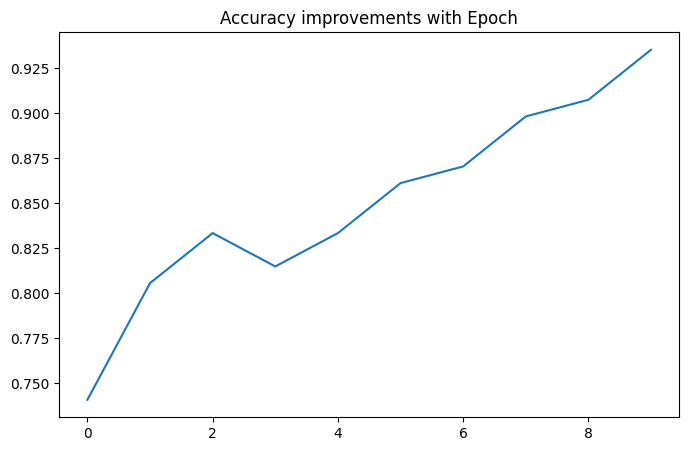

In [18]:
#Make it verbose so we can see the progress
VERBOSE=1

#Set Batch size
BATCH_SIZE=16

#Set number of epochs
EPOCHS=10

#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 

history=model.fit(X_train,
                  Y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=VERBOSE,
                  validation_split=VALIDATION_SPLIT)

import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [19]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.1949 - accuracy: 0.9333


[0.19491147994995117, 0.9333333373069763]

# 1.5 Saving and Loading Models

In [20]:
#Saving a model

model.save("iris_save")

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


In [21]:
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

In [22]:
#Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 1.6 Predictions with Learning Models

In [23]:
# Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)
scaled_input

array([[ 0.91683689, -0.13197948,  0.36489628,  0.26414192]])

In [24]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
raw_prediction

1/1 [==============================] - 0s 46ms/step


array([[0.01455275, 0.7370533 , 0.24839401]], dtype=float32)

In [25]:
#Find prediction
prediction = np.argmax(raw_prediction)
label_encoder.inverse_transform([prediction])

array(['versicolor'], dtype=object)